In [268]:
import requests
import re
from bs4 import BeautifulSoup
from collections import defaultdict
import networkx as nx

# get data from web page

In [182]:
headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}

url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
source_code = requests.get(url, headers=headers).content.decode('utf8')

In [183]:
better_page = BeautifulSoup(source_code, 'html.parser')

In [184]:
tables = better_page.find_all("table")

In [185]:
subway_url = {}
reg_rxp = re.compile(r'北京地铁.*线')
for table in tables:
    for a in table.find_all('a'):
        if a.has_attr('href') and reg_rxp.search(a.get_text()):
            subway_url[a.get_text()] = 'https://baike.baidu.com' + a.get('href')
    if subway_url:
        break
subway_url

{'北京地铁1号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 '北京地铁2号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF',
 '北京地铁4号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
 '北京地铁5号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 '北京地铁6号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF',
 '北京地铁7号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF',
 '北京地铁8号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
 '北京地铁9号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF',
 '北京地铁10号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 '北京地铁13号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%B

In [265]:
station_connection = defaultdict(list)
station_distance = defaultdict(int)
headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
for subway_url_i, url_i in subway_url.items():
    print("process {}".format(subway_url_i))
    source_code = requests.get(url_i, headers=headers).content.decode('utf8')
    better_page = BeautifulSoup(source_code, 'html.parser')
    cities = better_page.find_all("th", string=re.compile("(.+)——(.+)"))
    for city in cities:
        c1, c2 = city.get_text().split("——")
        distance = re.search("([0-9]+)米?", cities[0].next_sibling.get_text()).groups()[0]
        station_connection[c1].append(c2)
        station_connection[c2].append(c1)
        station_distance[(c1, c2)] = int(distance)


process 北京地铁1号线
process 北京地铁2号线
process 北京地铁4号线
process 北京地铁5号线
process 北京地铁6号线
process 北京地铁7号线
process 北京地铁8号线
process 北京地铁9号线
process 北京地铁10号线
process 北京地铁13号线
process 北京地铁14号线
process 北京地铁15号线
process 北京地铁16号线
process 北京地铁八通线
process 北京地铁昌平线
process 北京地铁亦庄线
process 北京地铁房山线


IndexError: too many indices for array

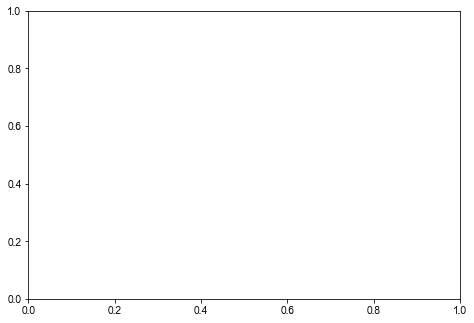

In [271]:
city_graph = nx.Graph(station_connection)
nx.(city_graph, station_connection, with_labels=True, node_size=10)

In [257]:
cities[0].next_sibling.get_text()

'2606米'

In [263]:
re.search("([0-9]+)米?", cities[0].next_sibling.get_text()).groups()[0]

('2606',)

[<th>苹果园——古城</th>,
 <th>古城——八角游乐园</th>,
 <th>八角游乐园——八宝山</th>,
 <th>八宝山——玉泉路</th>,
 <th>玉泉路——五棵松</th>,
 <th>五棵松——万寿路</th>,
 <th>万寿路——公主坟</th>,
 <th>公主坟——军事博物馆</th>,
 <th>军事博物馆——木樨地</th>,
 <th>木樨地——南礼士路</th>,
 <th>南礼士路——复兴门</th>,
 <th>复兴门——西单</th>,
 <th>西单——天安门西</th>,
 <th>天安门西——天安门东</th>,
 <th>天安门东——王府井</th>,
 <th>王府井——东单</th>,
 <th>东单——建国门</th>,
 <th>建国门——永安里</th>,
 <th>永安里——国贸</th>,
 <th>国贸——大望路</th>,
 <th>大望路——四惠</th>,
 <th>四惠——四惠东</th>]

# get data informaion from the source, plot graphs

In [ ]:

for line in subway_url:
    line_url = subway_url[line]
    headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
    source_code = requests.get(line_url, headers=headers).content.decode('utf8')
    tables = 
            for table in tables:
            first_row = table.find('tr')
            if first_row:
                first_col = first_row.find('th')
                if first_col and first_col.get_text().strip() == self.key_words[next_level_name]:
                    #print(table.prettify())
                    for a in table.find_all('a'):
                        if a.has_attr('href') and self.reg_exrp[next_level_name].search(a.get_text()):
                            next_url_info.append((a.get_text(), 'https://baike.baidu.com' + a.get('href')))
        return next_url_info

In [178]:
class subway_planner:
    def __init__(self, ):
        self.subway_url = {}
        self.reg_exrp = {"北京地铁":re.compile("北京.*地铁$"), "北京地铁线":re.compile("北京地铁.*线$"), "北京地铁站":re.compile(".+站$")}
        #keywords stores the key words on top of the table on the webpage
        self.key_words = {"北京地铁":"", "北京地铁线":"线路", "北京地铁站":"车站名称"}
        self.subway_structure = {"北京地铁":"北京地铁线", "北京地铁线":"北京地铁站", "北京地铁站":""}
        self.reg_find_level = {re.compile("北京.*地铁$"):"北京地铁", re.compile("北京地铁.*线$"):"北京地铁线", re.compile(".+站$"):"北京地铁站"}
    
    def get_source_code(self, url):
        headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
        source_code = requests.get(url, headers=headers).content.decode('utf8')
        return source_code
        
    def get_next_url(self, curr_url, next_level_name):
        source_code = self.get_source_code(curr_url)
        better_page = BeautifulSoup(source_code, 'html.parser')
        tables = better_page.find_all("table")
        next_url_info = []
        for table in tables:
            first_row = table.find('tr')
            if first_row:
                first_col = first_row.find('th')
                if first_col and first_col.get_text().strip() == self.key_words[next_level_name]:
                    #print(table.prettify())
                    for a in table.find_all('a'):
                        if a.has_attr('href') and self.reg_exrp[next_level_name].search(a.get_text()):
                            next_url_info.append((a.get_text(), 'https://baike.baidu.com' + a.get('href')))
        return next_url_info
        
    def build_subway_url(self, start_key = "北京地铁", start_url = "https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485"):
        stack = [(start_key, start_url)]
        while stack:
            curr_key, curr_url = stack.pop(0)
            if curr_key in self.subway_url:
                continue
            curr_url_info = {}
            curr_url_info["url"] = curr_url
            #if start_key is a station, return empty list
            if self.reg_exrp["北京地铁站"].search(curr_key):
                next_urls = []
            else:
                #return a list of tuples (name, url)
                curr_level = [level for reg, level in self.reg_find_level.items() if reg.search(curr_key)][0]
                next_urls = self.get_next_url(curr_url, self.subway_structure[curr_level])
            curr_url_info["next_level"] = [name for name, url in next_urls]
            
            self.subway_url[curr_key] = curr_url_info
            stack = stack + next_urls
        return 

# init a new "subway_planner" object

In [179]:
Sub_Planner = subway_planner()

In [175]:
Sub_Planner.build_subway_url("北京地铁1号线", "https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF")

北京地铁线


# get subway_urls 

In [180]:
Sub_Planner.build_subway_url()
Sub_Planner.subway_url

{'北京地铁': {'url': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485',
  'next_level': ['北京地铁1号线',
   '北京地铁2号线',
   '北京地铁4号线',
   '北京地铁5号线',
   '北京地铁6号线',
   '北京地铁7号线',
   '北京地铁8号线',
   '北京地铁9号线',
   '北京地铁10号线',
   '北京地铁13号线',
   '北京地铁14号线',
   '北京地铁14号线',
   '北京地铁15号线',
   '北京地铁16号线',
   '北京地铁八通线',
   '北京地铁昌平线',
   '北京地铁亦庄线',
   '北京地铁房山线']},
 '北京地铁1号线': {'url': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
  'next_level': ['黑石头站']},
 '北京地铁2号线': {'url': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF',
  'next_level': ['西直门站',
   '积水潭站',
   '鼓楼大街站',
   '安定门站',
   '雍和宫站',
   '东直门站',
   '东四十条站',
   '朝阳门站',
   '建国门站',
   '北京站',
   '崇文门站',
   '前门站',
   '和平门站',
   '宣武门站',
   '长椿街站',
   '复兴门站',
   '阜成门站',
   '车公庄站']},
 '北京地铁4号线': {'url': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
  'next_level': []},
 '北京地铁5号线': {'url': 'https://baike.baidu.com/it